<div align="center">

# **Multivariate Statistical Analysis**

# **Final Project Report**

</div>

:<div align="center">
    
# **Nguyen Xuan Binh - 887799**

</div>

</br>
</br>
</br>
</br>
</br>
</br>

# **Table of Contents**

### 1. [Introduction](#1-introduction)
### 2. [Univariate Analysis](#2-univariate-analysis)
### 3. [Bivariate Analysis](#3-bivariate-analysis)
### 4. [Multivariate Analysis](#4-multivariate-analysis)
   #### 4.1 [Selection of Methods](#41-selection-of-methods)
   #### 4.2 [Technical Implementation](#42-technical-implementation)
   #### 4.3 [Result Presentation and Interpretation](#43-result-presentation-and-interpretation)
### 5. [Critical Evaluations](#5-critical-evaluations)
### 6. [Conclusion](#6-conclusion)
### 7. [Reference](#7-reference)


</br>
</br>
</br>
</br>
</br>
</br>

# 1. INTRODUCTION (0.5 point)

New material discoveries are a major driver of technological development. The discovery of steel and bronze in antiquity and the development of synthetic polymers in the 20th century were two examples of how new materials have drastically altered human society. These days, advances in materials science are also essential for addressing some of the most important social issues, like climate change and the future of our energy supply.

Nonetheless, there is still a lot of trial and error involved in materials discovery today. Finding a material that is appropriate for a technological use might take decades of study, and optimizing that material for commercialization can take much longer. 

In this report, I introduce the Materials Project (www.materialsproject.org) dataset [1], which is a component of the Materials Genome Initiative. One of the Materials Project’s key purpose is to compute the properties of compounds for which experimental data may be incomplete. This comprehensive dataset consists of 83989 atoms/molecules, which is the version on 2018. The dataset is available at this URL

https://figshare.com/articles/dataset/Materials_Project_Data/7227749



"What insights can be derived from the relationships and distributions of electronic, magnetic, and mechanical properties within various materials, and how do these properties influence the likelihood of materials possessing elastic characteristics?"

Rationale for the Question:
This research question is designed to explore the potential of materials for applications in renewable energy, a pressing global issue. The properties provided in the dataset offer a unique opportunity to assess materials from various perspectives:

# 2. Univariate analysis

### 2.2 Dataset description

In this dataset, there are in total 7 columns, 6 of which are properties of the atoms or molecules. The first column contains the chemical formula for the corresponding atom or molecule based on IUPAC nomenclature. 

The six columns (properties) are:

- energy_above_hull: This represents the energy above the convex hull for a given material. If a material has an energy above hull of zero, it is on the convex hull and is considered thermodynamically stable. A positive value indicates how much energy would need to be removed from the material to make it as stable as the stable phases on the hull. This is crucial for understanding phase stability in materials science.

- band_gap: This is an energy range in a solid where no electronic states exist. Substances having large band gaps (also called "wide" band gaps) are generally insulators, those with small band gaps (also called "narrow" band gaps) are semiconductor, and conductors either have very small band gaps or none, because the valence and conduction bands overlap to form a continuous band.

- total_magnetization: This is the density of permanent or induced magnetic dipole moments within a magnetic material.

- total_energy: This includes both kinetic energy (associated with molecular motion) and potential energy (related to chemical bonds) for an atom or the whole molecule

- energy_per_atom: This is the total energy divided by the number of atoms in the unit cell. It provides a way to compare the energy contents of materials with different sizes and compositions.

- formation_energy_per_atom: This is the amount of energy evolved or absorbed when a substance is formed from its constituent elements in a certain condition of temperature and pressure

There are also other 3 columns, elastic_anisotropy, K_VRH (Voigt-Reuss-Hill average of the bulk modulus), G_VRH (Voigt-Reuss-Hill average of the shear modulus) which has more empty entries than nonempty entries. As a result, we would be interested to understand what are the correlations between the 6 properties mentioned above with the availability of the three elastic properties, and we are also interested in the distribution of the 3 elastic properties as well. Furthermore, when a material lacks elastic properties, it simultaneously lacks all 3 elastic properties. As a result, we can assign a label of 0 to materials without elastic properties and 1 to materials with elastic properties.

### 2.2 Statistic summary and visualization

In [1]:
from IPython.core.display import HTML
HTML('<style>.input, .jp-InputArea {display: none !important}</style>')

%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
mp_nostruct = pd.read_csv('mp_nostruct_clean.csv')

# The 10 columns 
# formula
# energy_above_hull
# band_gap
# total_magnetization
# total_energy
# energy_per_atom
# formation_energy_per_atom
# elastic_anisotropy
# K_VRH
# G_VRH

mp_nostruct.head(10)

,formula,energy_above_hull,band_gap,total_magnetization,total_energy,energy_per_atom,formation_energy_per_atom,elastic_anisotropy,K_VRH,G_VRH
0,In,0.003319,0.0000,2.700000e-05,-2.721563,-2.721563,0.003319,1.044699,33.154748,4.904836
1,Mg,0.039182,0.0000,-1.360000e-05,-1.565153,-1.565153,0.039182,-11.326659,35.636106,1.830272
2,Be,0.108143,0.0000,1.000000e-07,-14.537871,-3.634468,0.108143,8.030000,124.000000,84.000000
3,Hf,0.071216,0.0000,-2.050000e-05,-9.883049,-9.883049,0.071216,0.881277,101.242732,44.836516
4,P,3.509988,2.0113,3.000042e+00,-1.895193,-1.895193,3.509988,10.884643,0.327165,-0.064038
5,Xe,0.005612,6.1701,0.000000e+00,-0.030139,-0.030139,0.005612,NaN,NaN,NaN
6,Hg,0.020462,0.0000,-2.800000e-06,-0.283229,-0.283229,0.020462,NaN,NaN,NaN
7,Br,0.615956,0.0000,-1.807400e-03,-1.013059,-1.013059,0.615956,-60.573886,21.044759,-18.850184
8,Sr,0.008637,0.0000,-1.827100e-03,-1.677328,-1.677328,0.008637,8.702322,11.543947,6.232662
9,Xe,0.000000,6.1671,1.040000e-05,-0.035751,-0.035751,0.000000,NaN,NaN,NaN


We can see the NaN entries in the elastic properties for some materials. Now we proceed to create a label for the whole dataset

In [4]:
# Creating full dataset with the label
mp_nostruct_label = mp_nostruct.copy()

# 0 if elastic_anisotropy is NaN and 1 otherwise

mp_nostruct_label['has_elastic_props'] = mp_nostruct_label[['elastic_anisotropy', 'K_VRH', 'G_VRH']].notna().all(axis=1).astype(int)

# divide the dataset into two datasets: one with elastic properties and one without elastic properties

# This dataset contains materials that do not have the elastic properties
mp_nostruct_without_elastic = mp_nostruct_label[mp_nostruct_label['has_elastic_props'] == 0].drop(columns=['elastic_anisotropy', 'K_VRH', 'G_VRH', 'has_elastic_props'])

# This dataset contains materials that have the elastic properties
mp_nostruct_with_elastic = mp_nostruct_label[mp_nostruct_label['has_elastic_props'] == 1].drop(columns=['has_elastic_props'])

# This dataset includes all materials but excludes the columns for elastic properties, 
# focusing only on the primary material properties and the label indicating the presence or absence of elastic data.

mp_nostruct_all_no_elastic = mp_nostruct_label.drop(columns=['elastic_anisotropy', 'K_VRH', 'G_VRH'])

nonelastic_features = ['energy_above_hull',
                        'band_gap',
                        'total_magnetization',
                        'total_energy',
                        'energy_per_atom',
                        'formation_energy_per_atom']

mp_nostruct_with_elastic.head(10)

,formula,energy_above_hull,band_gap,total_magnetization,total_energy,energy_per_atom,formation_energy_per_atom,elastic_anisotropy,K_VRH,G_VRH
0,In,0.003319,0.0000,2.700000e-05,-2.721563,-2.721563,0.003319,1.044699,33.154748,4.904836
1,Mg,0.039182,0.0000,-1.360000e-05,-1.565153,-1.565153,0.039182,-11.326659,35.636106,1.830272
2,Be,0.108143,0.0000,1.000000e-07,-14.537871,-3.634468,0.108143,8.030000,124.000000,84.000000
3,Hf,0.071216,0.0000,-2.050000e-05,-9.883049,-9.883049,0.071216,0.881277,101.242732,44.836516
4,P,3.509988,2.0113,3.000042e+00,-1.895193,-1.895193,3.509988,10.884643,0.327165,-0.064038
7,Br,0.615956,0.0000,-1.807400e-03,-1.013059,-1.013059,0.615956,-60.573886,21.044759,-18.850184
8,Sr,0.008637,0.0000,-1.827100e-03,-1.677328,-1.677328,0.008637,8.702322,11.543947,6.232662
10,Ti,0.114489,0.1069,1.560000e-05,-7.782638,-7.782638,0.114489,-4.980000,105.000000,1287.000000
12,Cs,0.001608,0.0000,2.568000e-04,-0.858819,-0.858819,0.001608,104.159480,1.712808,0.439863
15,Li,0.002860,0.0000,1.005000e-04,-1.905112,-1.905112,0.002860,-4.976255,13.860513,15.128887


In [5]:
# Create a dataframe that contains the 6 columns except formula
# and the indices are the rows for statistics value
# mean, std, skewness, kurtosis, 0% (min), 25%, 50% (median), 75%, 100% (max)

def create_statistic(df):
   
    mp_nostruct_stats = df.copy()

    # Get the statistics value for the 6 columns

    # Calculate various statistics
    stats_mean = mp_nostruct_stats.mean()
    stats_std = mp_nostruct_stats.std()
    stats_skew = mp_nostruct_stats.skew()
    stats_kurtosis = mp_nostruct_stats.kurt()
    stats_min = mp_nostruct_stats.min()
    stats_25 = mp_nostruct_stats.quantile(0.25)
    stats_50 = mp_nostruct_stats.median()  # or quantile(0.5)
    stats_75 = mp_nostruct_stats.quantile(0.75)
    stats_max = mp_nostruct_stats.max()

    # Combine all stats into a new DataFrame
    stats_df = pd.DataFrame({
        'mean': stats_mean,
        'std': stats_std,
        'skewness': stats_skew,
        'kurtosis': stats_kurtosis,
        '0%': stats_min,
        '25%': stats_25,
        '50%': stats_50,
        '75%': stats_75,
        '100%': stats_max
    })

    # Transpose the DataFrame to have statistics as indices
    mp_nostruct_stats = stats_df.T

    return mp_nostruct_stats

mp_nostruct_with_elastic_stats = create_statistic(mp_nostruct_with_elastic.drop(columns=['formula']))
mp_nostruct_without_elastic_stats = create_statistic(mp_nostruct_without_elastic.drop(columns=['formula']))
mp_nostruct_all_no_elastic_stats = create_statistic(mp_nostruct_all_no_elastic.drop(columns=['formula', 'has_elastic_props']))

print('Statistics for all materials excluding elastic properties\n')
mp_nostruct_all_no_elastic_stats


Statistics for all materials excluding elastic properties



,energy_above_hull,band_gap,total_magnetization,total_energy,energy_per_atom,formation_energy_per_atom
mean,0.142806,1.181326,5.315005,-171.822498,-5.815823,-1.475265
std,0.423493,1.564290,12.624827,185.554043,1.823426,1.247408
skewness,5.920774,1.346495,4.908275,-2.227180,0.318152,0.530711
kurtosis,40.817304,1.497373,40.911982,7.051213,0.226503,0.507995
0%,0.000000,0.000000,-84.003218,-1834.877179,-14.331771,-4.522664
25%,0.000000,0.000000,0.000000,-235.703841,-7.031504,-2.489777
50%,0.027675,0.272400,0.001509,-107.725258,-6.036196,-1.613350
75%,0.094054,2.113900,5.000003,-40.486961,-4.724733,-0.484626
100%,5.892481,17.891400,279.988888,-0.016100,-0.016100,4.828697


1. Energy Above hull:

- The mean energy above hull is relatively low at 0.142806, indicating that most materials are close to being thermodynamically stable.
- The distribution of energy above hull is highly skewed (skewness = 5.920774) and has a very high kurtosis (40.817304), suggesting a concentration of values near zero with some extreme outliers.

2. Band gap:

- The average band gap is 1.181326, with a broad range extending up to 17.8914, indicating a diverse set of materials from conductors to wide-band-gap insulators.
- The band gap shows a positive skewness (1.346495) and a moderate kurtosis (1.497373), reflecting that many materials have low band gaps with fewer high band gap materials.

3. Total magnetization:

- Total magnetization varies widely, from -84.003218 to 279.988888, with a mean close to 5.315005, pointing to varying degrees of magnetic properties among the materials.
- The data is positively skewed (4.908275) and has a high kurtosis (40.911982), indicating a large number of materials with near-zero magnetization and few materials with high magnetization.

4. Total energy:

- The total energy has a mean of -171.822498 and ranges significantly from -1834.877179 to just -0.016100, suggesting a wide variation in the stability and energy states of the materials.
- The distribution of total energy is negatively skewed (-2.227180), showing that most materials cluster around a lower energy state, but there are some with much higher energy levels.

5. Energy per atom:

- The average energy per atom is -5.815823, with values ranging from -14.331771 to -0.016100, indicating that the energy per atom varies significantly across different materials.
- This feature shows a slight positive skewness (0.318152), which means that most materials have energy values slightly lower than the mean with fewer high-energy outliers.

6. Formation energy per atom:

- The mean formation energy per atom is -1.475265, highlighting general trends in the energy released or absorbed during the formation of these materials.
- The formation energy per atom also displays a slight positive skewness (0.530711) and a low kurtosis (0.507995), suggesting a fairly normal distribution with a modest spread of values around the mean.

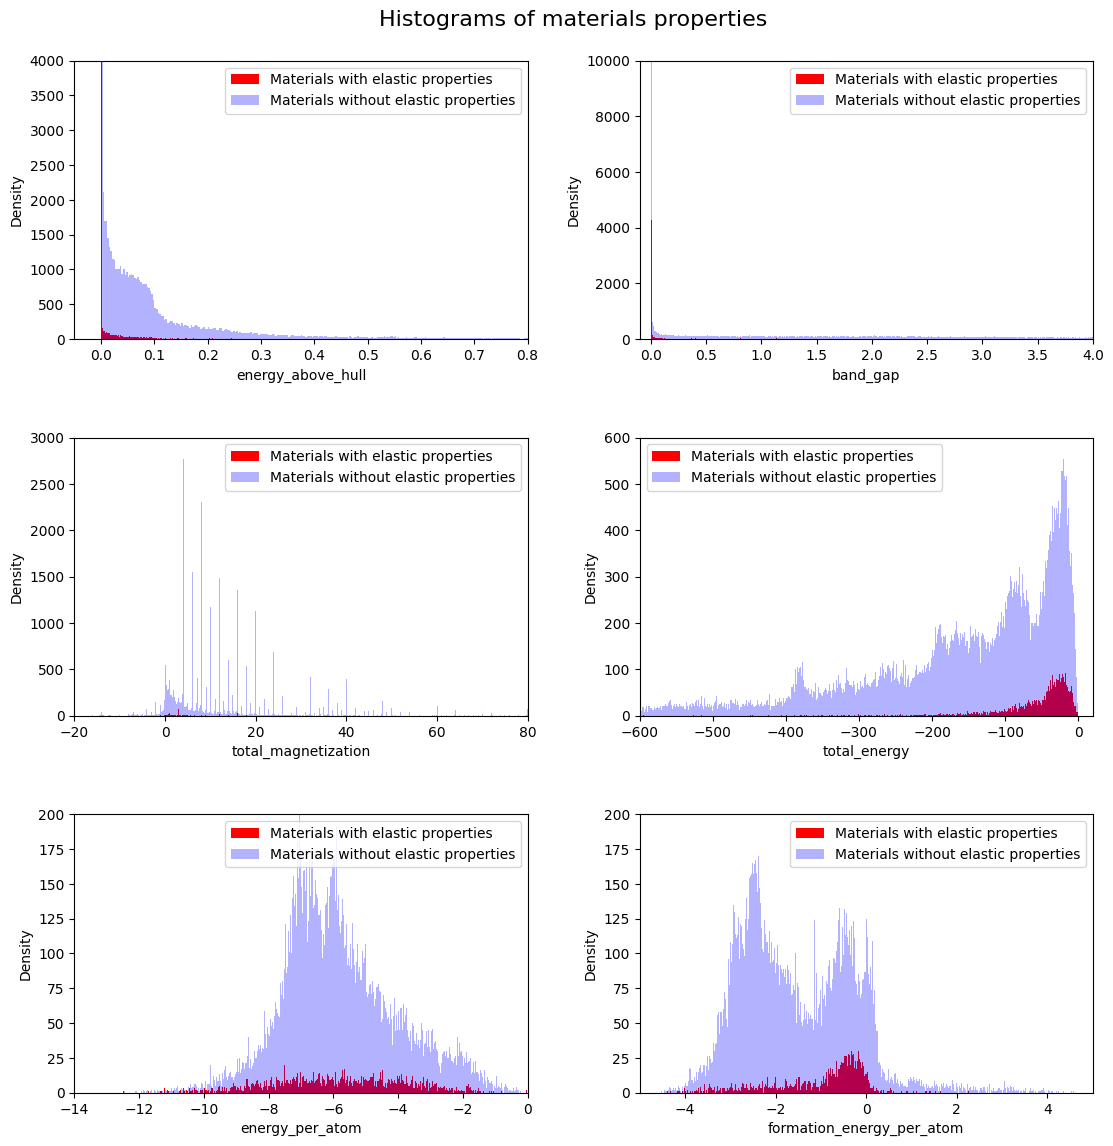

In [6]:
y_lims = [4000, 10000, 3000, 600, 200, 200]
x_lims = [(-0.05, 0.8), (-0.1, 4), (-20, 80), (-600, 20), (-14, 0), (-5, 5)]
# Figure 1: Histograms with density overlays
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # Adjust figsize as needed
fig.tight_layout(pad=5.0)
axes = axes.ravel()  # Flatten the array for easier indexing
fig.suptitle('Histograms of materials properties', fontsize=16)

for i, feature in enumerate(nonelastic_features):

    axes[i].hist(mp_nostruct_with_elastic[feature], bins=2000, density=False, alpha=1.0, color='red', label='Materials with elastic properties')
    axes[i].hist(mp_nostruct_without_elastic[feature], bins=2000, density=False, alpha=0.3, color='blue', label='Materials without elastic properties')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

    axes[i].set_ylim(0, y_lims[i])
    axes[i].set_xlim(x_lims[i][0], x_lims[i][1])
    axes[i].legend()

plt.show()

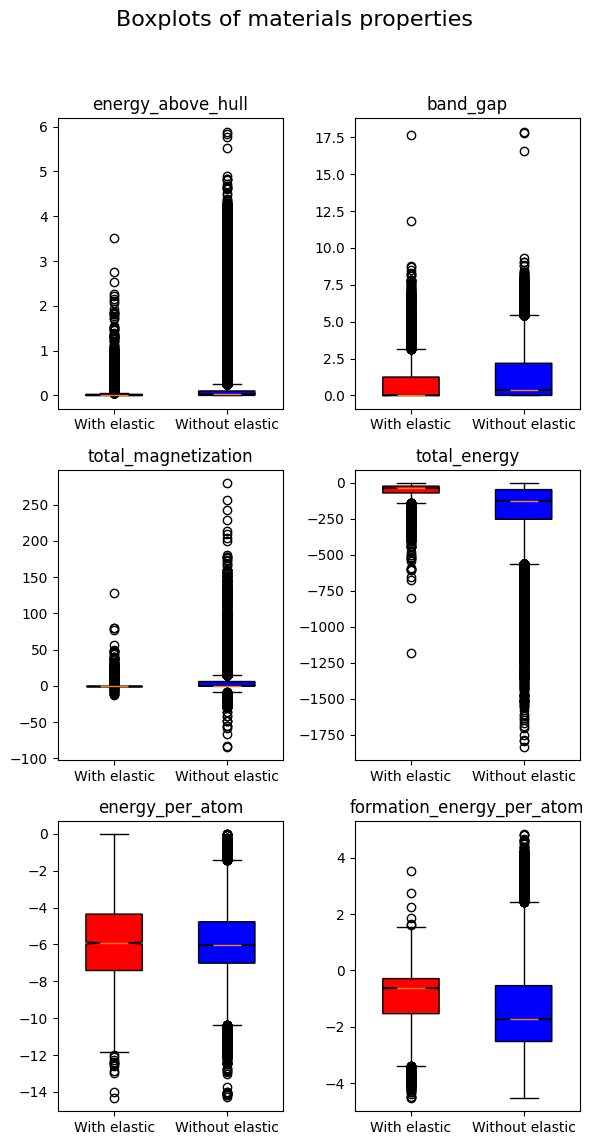

In [7]:

fig, axes = plt.subplots(3, 2, figsize=(6, 12))  
axes = axes.ravel()  
fig.suptitle('Boxplots of materials properties', fontsize=16)

for i, feature in enumerate(nonelastic_features):
    data_to_plot = [mp_nostruct_with_elastic[feature], mp_nostruct_without_elastic[feature]]
    bplot = axes[i].boxplot(data_to_plot, notch=True, patch_artist=True, labels=['With elastic', 'Without elastic'], widths=0.5)
    
    # Customizing the box colors
    box_colors = ['red', 'blue']  
    for patch, color in zip(bplot['boxes'], box_colors):
        patch.set_facecolor(color)
    
    axes[i].set_title(feature)
    # axes[i].set_ylabel('Value')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()


# 3. Bivariate analysis

### Pairwise scatter plots

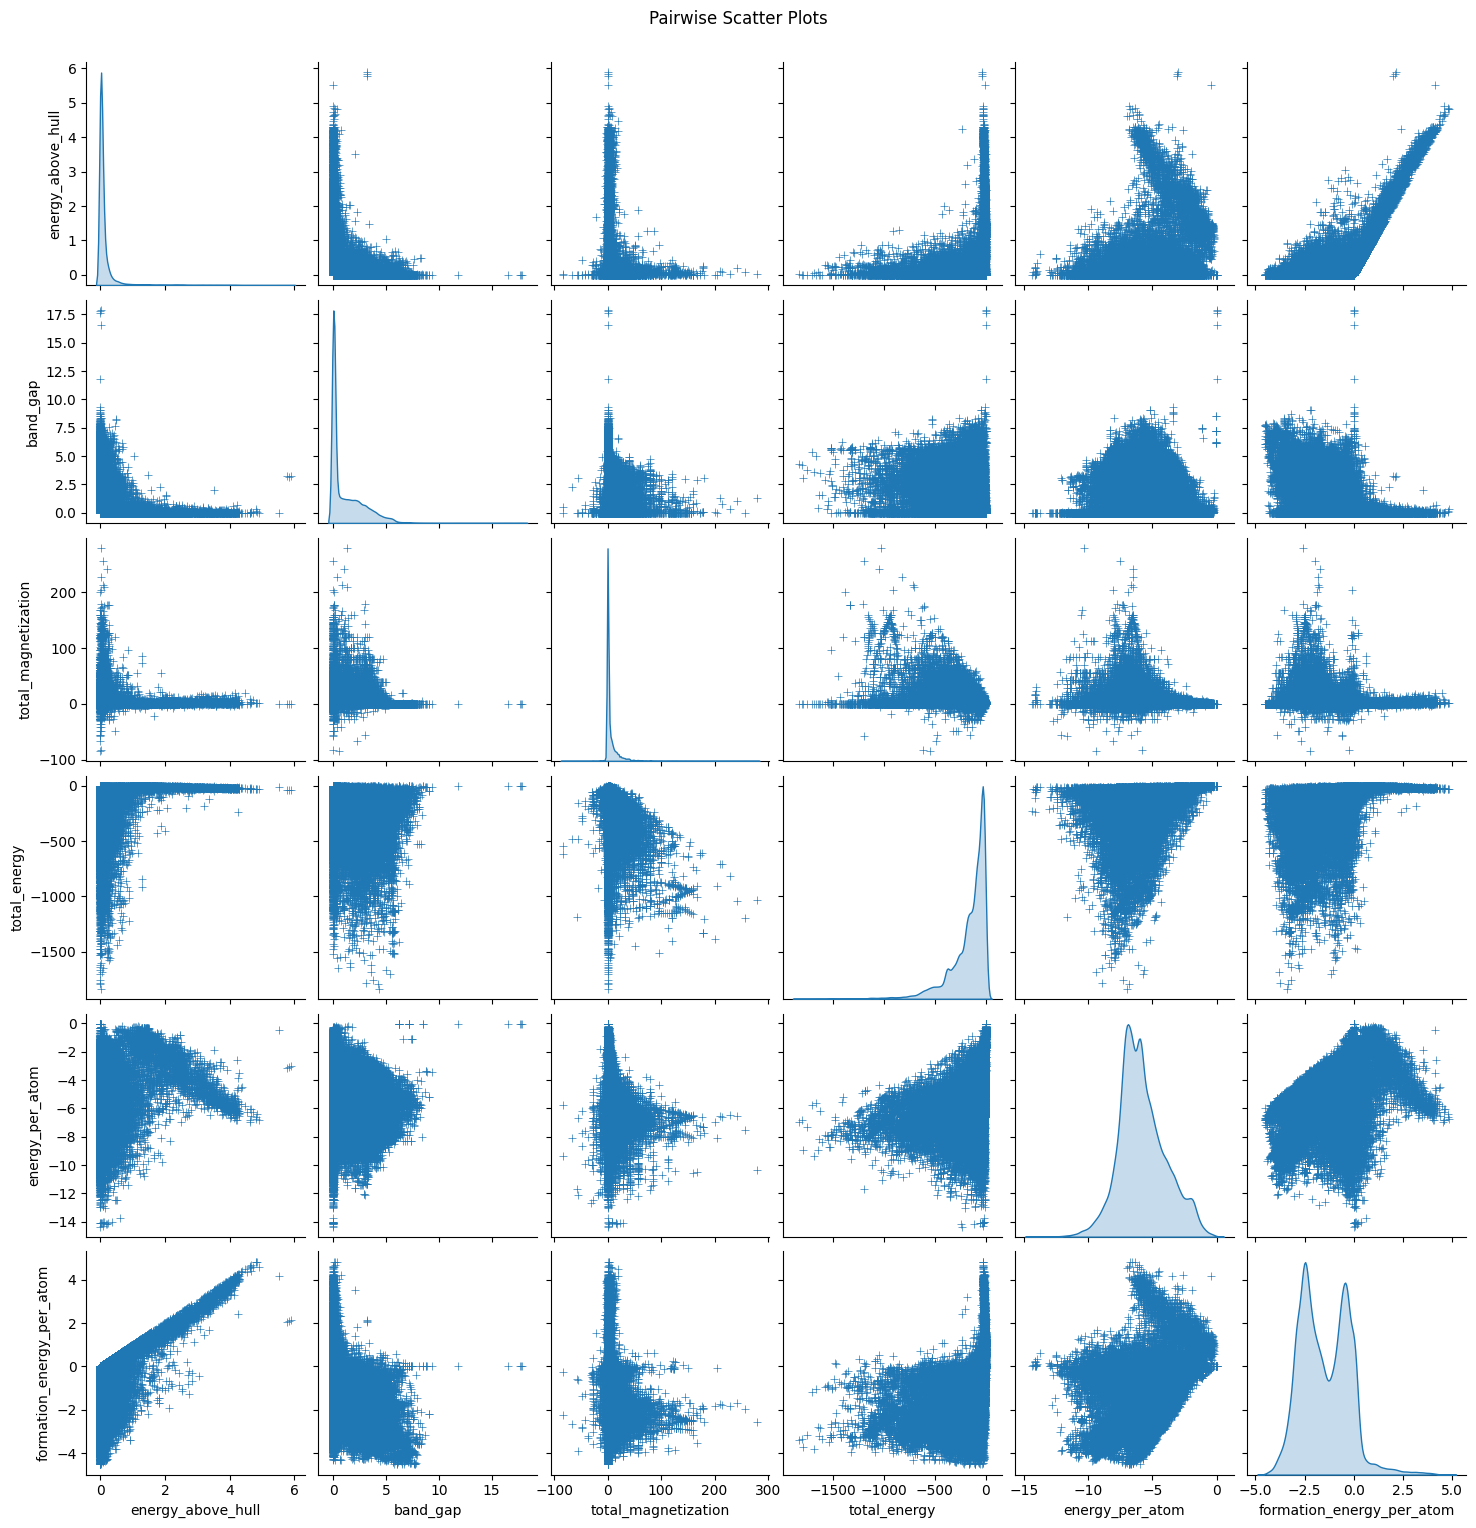

In [8]:
# Create a pair plot with regression lines to see the correlations

sns.pairplot(mp_nostruct_all_no_elastic[nonelastic_features], kind='scatter', diag_kind='kde', markers='+')
plt.suptitle('Pairwise Scatter Plots', y=1.02)  # Adjust the title's y-position for better spacing
plt.show()


### Pairwise Pearson correlations matrix

The formula of the Pearson correlation coefficient is:

$$\rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X \sigma_Y} = \frac{E[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X \sigma_Y}$$

where $cov(X,Y)$ is the covariance of $X$ and $Y$, and $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$, respectively.

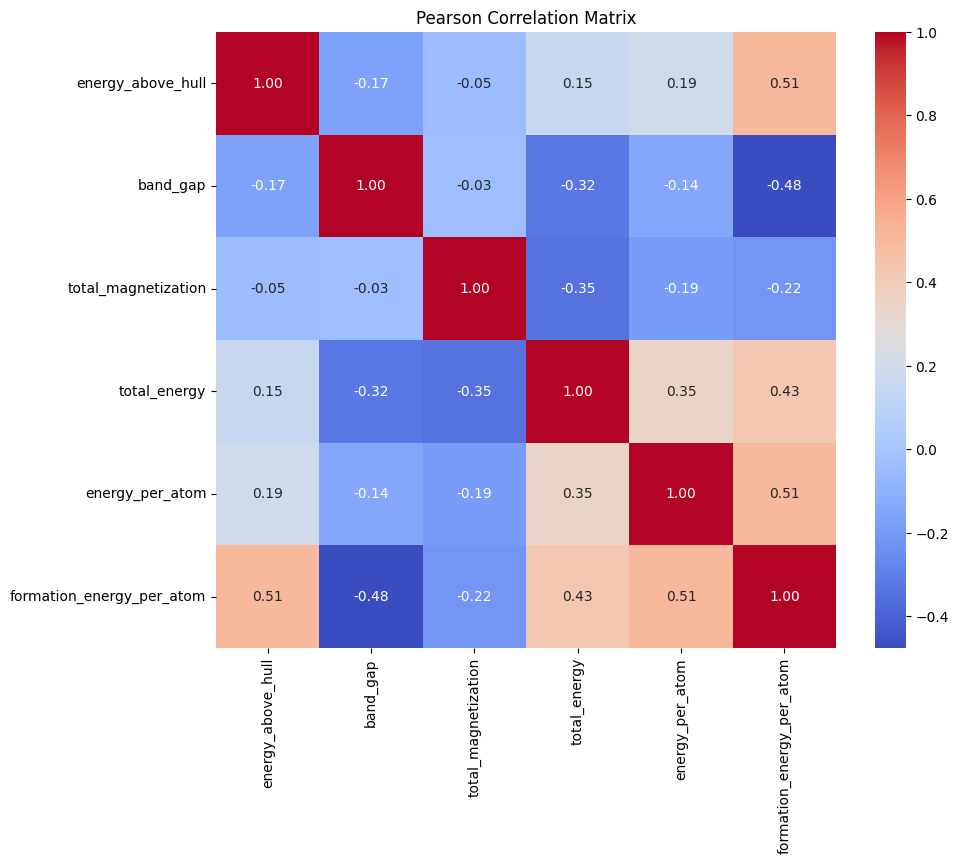

In [9]:
plt.figure(figsize=(10, 8))

pearson_corr = mp_nostruct_all_no_elastic[nonelastic_features].corr(method='pearson')
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()


### Pairwise Spearman correlations matrix

The formula of the Spearman correlation coefficient is:

$$\rho_{X,Y} = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$$

where $d_i$ is the difference between the ranks of $X_i$ and $Y_i$, and $n$ is the number of observations.

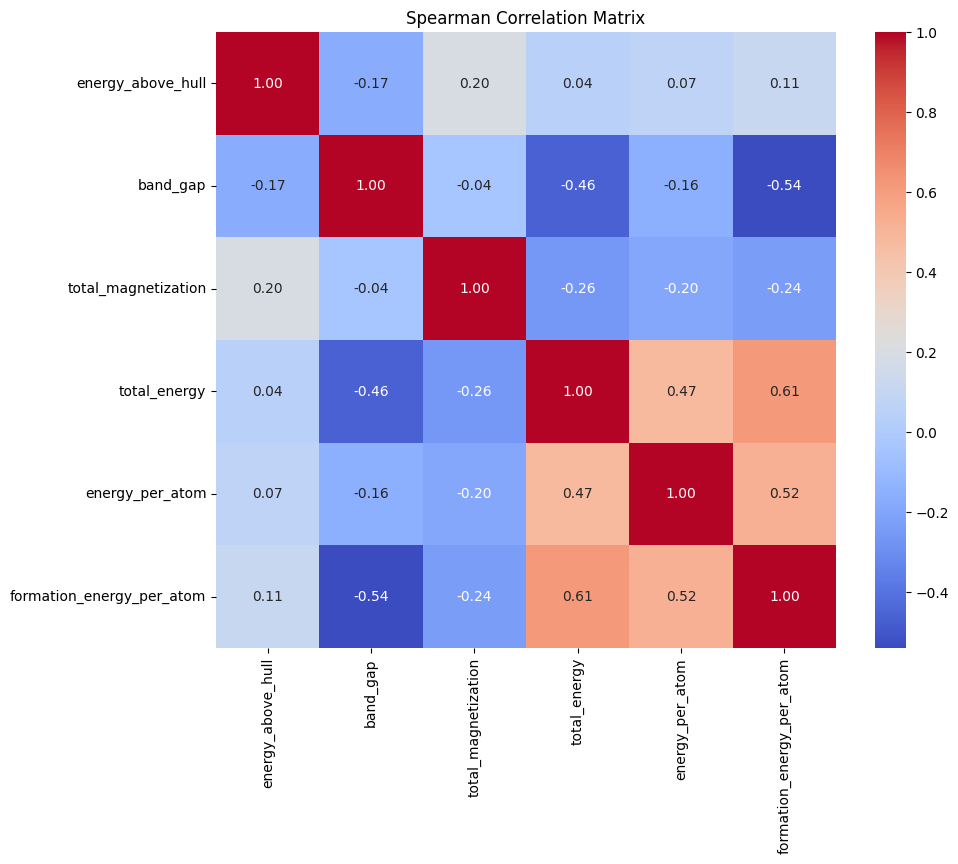

In [10]:
plt.figure(figsize=(10, 8))

spearman_corr = mp_nostruct_all_no_elastic[nonelastic_features].corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()

# 4. Multivariate analysis

### Pinciple component analysis (PCA)

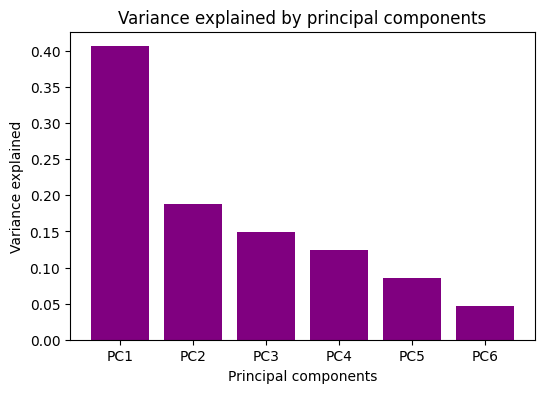

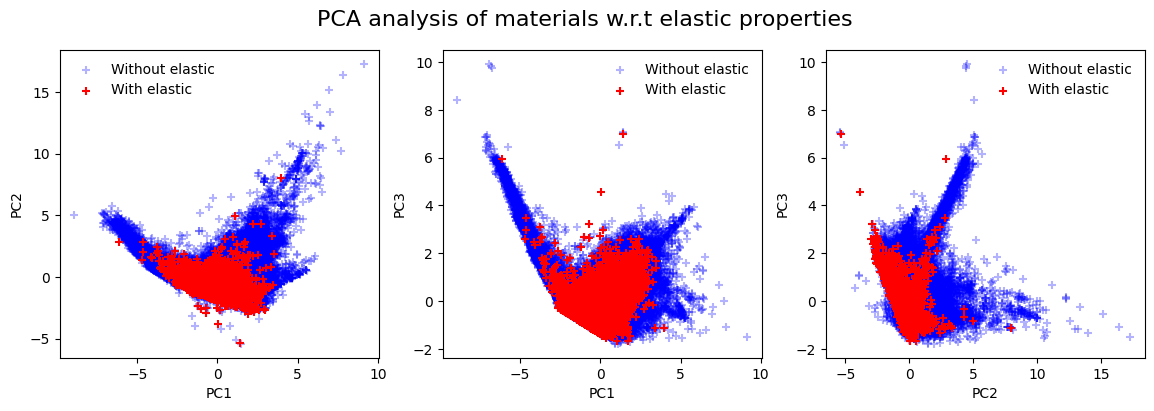

In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardizing the data
scaler = StandardScaler()

mp_nostruct_scaled = scaler.fit_transform(mp_nostruct_all_no_elastic[nonelastic_features])
has_elastic_props = mp_nostruct_all_no_elastic['has_elastic_props']

# Applying PCA
n_components = 6  # Number of principal components to extract
pca = PCA(n_components=n_components)  # Adjusting to extract three principal components
pca_components = pca.fit_transform(mp_nostruct_scaled)

# Creating a DataFrame for the principal components
pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])
pca_df['has_elastic_props'] = has_elastic_props
pca_df.to_csv('pca_df.csv', index=False)

# Explained variance ratio for PCs
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(6, 4))
plt.bar([f'PC{i}' for i in range(1, n_components + 1)], explained_variance, color='purple')
plt.xlabel('Principal components')
plt.ylabel('Variance explained')
plt.title('Variance explained by principal components')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(14, 4))  
axes = axes.ravel()  
fig.suptitle('PCA analysis of materials w.r.t elastic properties', fontsize=16)


axes[0].scatter(pca_df['PC1'][has_elastic_props == 0], pca_df['PC2'][has_elastic_props == 0], 
            color='blue', alpha=0.3, label='Without elastic', marker='+')
axes[0].scatter(pca_df['PC1'][has_elastic_props == 1], pca_df['PC2'][has_elastic_props == 1], 
            color='red', alpha=1, label='With elastic', marker='+')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend(frameon=False)

axes[1].scatter(pca_df['PC1'][has_elastic_props == 0], pca_df['PC3'][has_elastic_props == 0],
            color='blue', alpha=0.3, label='Without elastic', marker='+')
axes[1].scatter(pca_df['PC1'][has_elastic_props == 1], pca_df['PC3'][has_elastic_props == 1],
            color='red', alpha=1, label='With elastic', marker='+')

axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC3')
axes[1].legend(frameon=False)

axes[2].scatter(pca_df['PC2'][has_elastic_props == 0], pca_df['PC3'][has_elastic_props == 0],
            color='blue', alpha=0.3, label='Without elastic', marker='+')
axes[2].scatter(pca_df['PC2'][has_elastic_props == 1], pca_df['PC3'][has_elastic_props == 1],
            color='red', alpha=1, label='With elastic', marker='+')

axes[2].set_xlabel('PC2')
axes[2].set_ylabel('PC3')
axes[2].legend(frameon=False)

plt.show()

- Overlap in Principal Components: There is a significant overlap between materials with and without elastic properties in the space defined by the principal components, particularly in the PC1 vs. PC2 plot. This suggests that the two groups are not entirely distinct based on the principal components derived from the dataset.

- Distinct Regions: Despite the overlap, there are regions, especially in the PC1 vs. PC2 plot, where materials with elastic properties (red points) are more concentrated. This indicates potential underlying patterns that differentiate materials with elastic properties from those without.

- Spread and Distribution: The spread of the points shows that the first two principal components account for a substantial amount of variance in the dataset. Materials without elastic properties (blue points) tend to have a wider spread in the PC space, which might indicate greater variability in their underlying properties.

- Outliers: There are a few apparent outliers, particularly in materials with elastic properties, that are far removed from the main cluster. These could represent materials with unique properties or could be due to data recording anomalies.

### Plotting CCA

The maximum number of canonical components you can derive is equal to the number of variables in the smaller of the two sets (X or Y).
In this case it is 3, as the number of variables in X is 6 and the number of variables in Y is 3 (elastic properties)

In [12]:
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

# Assuming mp_nostruct is already loaded as DataFrame and contains the columns listed
X = mp_nostruct_with_elastic[['total_energy', 'energy_per_atom', 'formation_energy_per_atom', 'band_gap', 'total_magnetization', 'energy_above_hull']]
Y = mp_nostruct_with_elastic[['elastic_anisotropy', 'K_VRH', 'G_VRH']]

# Standardizing the data
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

# Apply CCA


cca = CCA(n_components=3)
cca.fit(X_scaled, Y_scaled)
X_cca, Y_cca = cca.transform(X_scaled, Y_scaled)

print("X_scaled shape:", X_scaled.shape)
print("Y_scaled shape:", Y_scaled.shape)
print("X_cca shape:", X_cca.shape)
print("Y_cca shape:", Y_cca.shape)

# Correlation matrix for the canonical variables
correlation_matrix = np.corrcoef(X_cca.T, Y_cca.T)

num_components = cca.n_components

canonical_correlations = [correlation_matrix[i, i + num_components] for i in range(num_components)]
print("\nCanonical correlations for each component:\n", canonical_correlations)

X_scaled shape: (7676, 6)
Y_scaled shape: (7676, 3)
X_cca shape: (7676, 3)
Y_cca shape: (7676, 3)

Canonical correlations for each component:
 [0.3530921165331174, 0.05933369482746479, 0.021787822466999063]


In [13]:
# Canonical weights for the X set
X_weights = cca.x_weights_

print("Canonical weights for the X set:\n", X_weights)

# Canonical weights for the Y set
Y_weights = cca.y_weights_
print("\nCanonical weights for the Y set:\n", Y_weights)


Canonical weights for the X set:
 [[ 0.08184554  0.13527149 -0.06987733]
 [ 0.93229499 -0.19228509  0.10179738]
 [-0.29200248 -0.14243519  0.23478563]
 [ 0.04068847 -0.49915525 -0.578655  ]
 [ 0.08090964  0.03942176  0.70630557]
 [ 0.17509992  0.82081072 -0.30971114]]

Canonical weights for the Y set:
 [[-0.01499877  0.03284619  0.99934787]
 [-0.49947887  0.86558    -0.03594601]
 [-0.86619622 -0.49969229  0.00342335]]


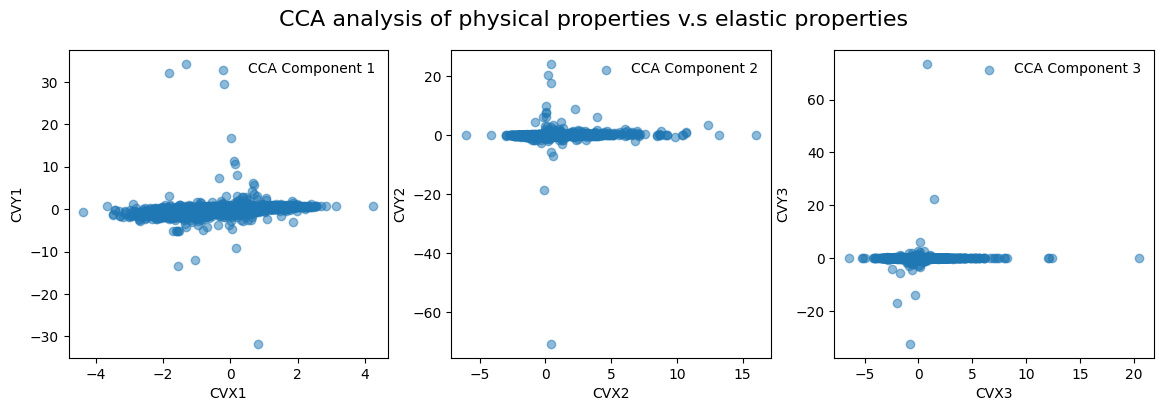

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))  
axes = axes.ravel()  
fig.suptitle('CCA analysis of physical properties v.s elastic properties', fontsize=16)

for cca_component in range(0, 3):
    # Plot the first pair of canonical variables
    CVX1 = X_cca[:, cca_component]
    CVY1 = Y_cca[:, cca_component]
    axes[cca_component].scatter(CVX1, CVY1, alpha=0.5, label=f"CCA Component {cca_component + 1}")
    axes[cca_component].set_xlabel(f'CVX{cca_component+1}')
    axes[cca_component].set_ylabel(f'CVY{cca_component+1}')
    axes[cca_component].legend(frameon=False)

plt.show()


### K-centers

In [9]:
# We only choose randomly 10k points to make the Kmeans runs faster

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
# importing  Calinski-Harabasz Index as well
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans


scaler = StandardScaler()

# set numpy seed to 42
np.random.seed(42)
# Choose random indices from 0 to the length of the dataset
random_indices = np.random.choice(len(mp_nostruct_all_no_elastic[nonelastic_features]), 20000, replace=False)

mp_nostruct_scaled = scaler.fit_transform(mp_nostruct_all_no_elastic[nonelastic_features])[random_indices]
has_elastic_props = mp_nostruct_all_no_elastic['has_elastic_props'][random_indices]

# Assuming 'mp_nostruct_scaled' is your scaled dataset

cluster_results = {}
# Calculate silhouette scores for different numbers of clusters
for n_clusters in range(2, 11):  # Example range from 2 to 10 clusters
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(mp_nostruct_scaled)
    silhouette_avg = silhouette_score(mp_nostruct_scaled, clusters)
    DB_score = davies_bouldin_score(mp_nostruct_scaled, clusters)
    CH_score = calinski_harabasz_score(mp_nostruct_scaled, clusters)
    print(f"For n_clusters = {n_clusters}")
    print(f"Average silhouette score: {round(silhouette_avg, 6)}, ", end="")
    print(f"Davies Bouldin score: {round(DB_score, 6)}, ", end="")
    print(f"Calinski Harabasz score: {round(CH_score, 6)}")
    cluster_results[n_clusters] = {"clusters": clusters, 
                                    "Silhouette": silhouette_avg,
                                    "Davies Bouldin": DB_score,
                                    "Calinski Harabasz": CH_score}

For n_clusters = 2
Average silhouette score: 0.272859, Davies Bouldin score: 1.422136, Calinski Harabasz score: 6787.903179
For n_clusters = 3
Average silhouette score: 0.279698, Davies Bouldin score: 1.297454, Calinski Harabasz score: 5435.723785
For n_clusters = 4
Average silhouette score: 0.253088, Davies Bouldin score: 1.265958, Calinski Harabasz score: 5490.112639
For n_clusters = 5
Average silhouette score: 0.270567, Davies Bouldin score: 1.093646, Calinski Harabasz score: 6948.889707
For n_clusters = 6
Average silhouette score: 0.260888, Davies Bouldin score: 1.124184, Calinski Harabasz score: 6674.867157
For n_clusters = 7
Average silhouette score: 0.278348, Davies Bouldin score: 1.075731, Calinski Harabasz score: 6805.71174
For n_clusters = 8
Average silhouette score: 0.28349, Davies Bouldin score: 1.026026, Calinski Harabasz score: 6684.750299
For n_clusters = 9
Average silhouette score: 0.27526, Davies Bouldin score: 1.064513, Calinski Harabasz score: 6404.731978
For n_clust

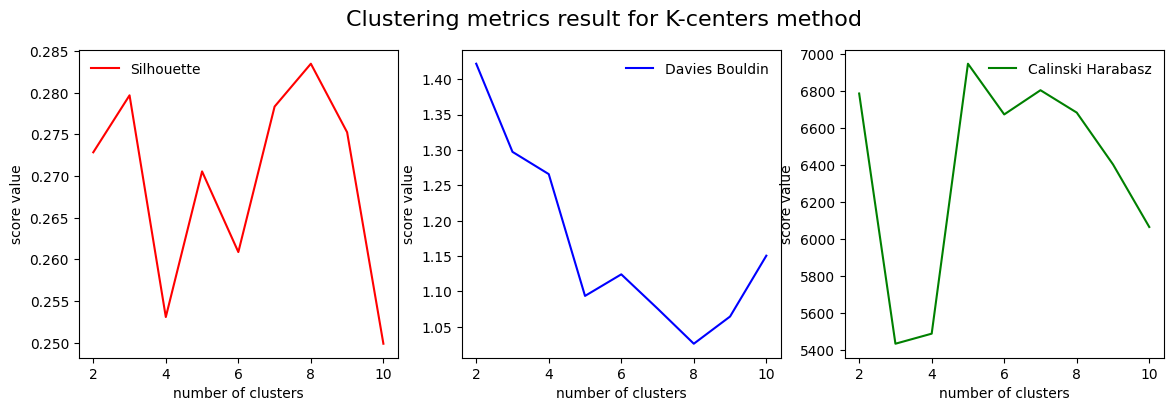

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))  
axes = axes.ravel()  
fig.suptitle('Clustering metrics result for K-centers method', fontsize=16)

score_names = ['Silhouette', 'Davies Bouldin', 'Calinski Harabasz']
colors = ['red', 'blue', 'green']
for score_index in range(0, 3):
    scores_value = [cluster_results[n_clusters][score_names[score_index]] for n_clusters in range(2, 11)]
    axes[score_index].plot(range(2, 11), scores_value, label=score_names[score_index], color=colors[score_index])
    axes[score_index].set_xlabel(f'number of clusters')
    axes[score_index].set_ylabel(f'score value')
    axes[score_index].legend(frameon=False)

plt.show()

In [14]:

pca_df.drop(columns=['cluster'], inplace=True)   
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,has_elastic_props
0,-2.043446,-0.459612,-0.529198,1.101036,-0.276095,0.125607,1
1,-2.357436,-0.525546,-0.355945,1.573650,-0.333132,-0.099505,1
2,-1.938177,-0.247605,-0.432982,0.616405,-0.236844,0.271719,1
3,-0.466614,0.257839,-1.138585,-2.081930,0.161907,1.452224,1
4,-6.158285,2.845745,5.958252,-1.321626,1.258803,-0.336250,1


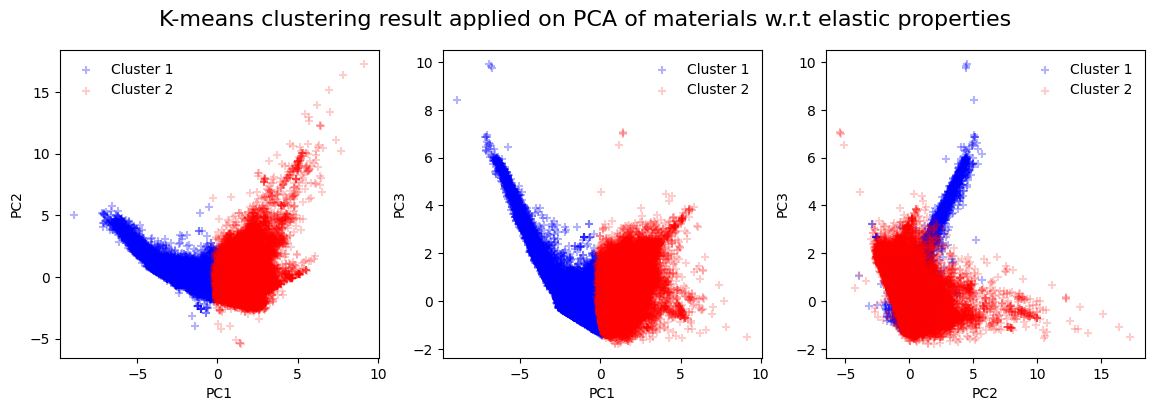

In [17]:

mp_nostruct_scaled = scaler.fit_transform(mp_nostruct_all_no_elastic[nonelastic_features])
has_elastic_props = mp_nostruct_all_no_elastic['has_elastic_props']

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_cluster_indices = kmeans.fit_predict(mp_nostruct_scaled)

pca_df['kmeans_cluster'] = kmeans_cluster_indices
pca_df.to_csv('pca_df.csv', index=False)

fig, axes = plt.subplots(1, 3, figsize=(14, 4))  
axes = axes.ravel()  
fig.suptitle('K-means clustering result applied on PCA of materials w.r.t elastic properties', fontsize=16)


axes[0].scatter(pca_df['PC1'][kmeans_cluster_indices == 0], pca_df['PC2'][kmeans_cluster_indices == 0], 
            color='blue', alpha=0.3, label='Cluster 1', marker='+')
axes[0].scatter(pca_df['PC1'][kmeans_cluster_indices == 1], pca_df['PC2'][kmeans_cluster_indices == 1], 
            color='red', alpha=0.2, label='Cluster 2', marker='+')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend(frameon=False)

axes[1].scatter(pca_df['PC1'][kmeans_cluster_indices == 0], pca_df['PC3'][kmeans_cluster_indices == 0],
            color='blue', alpha=0.3, label='Cluster 1', marker='+')
axes[1].scatter(pca_df['PC1'][kmeans_cluster_indices == 1], pca_df['PC3'][kmeans_cluster_indices == 1],
            color='red', alpha=0.2, label='Cluster 2', marker='+')

axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC3')
axes[1].legend(frameon=False)

axes[2].scatter(pca_df['PC2'][kmeans_cluster_indices == 0], pca_df['PC3'][kmeans_cluster_indices == 0],
            color='blue', alpha=0.3, label='Cluster 1', marker='+')
axes[2].scatter(pca_df['PC2'][kmeans_cluster_indices == 1], pca_df['PC3'][kmeans_cluster_indices == 1],
            color='red', alpha=0.2, label='Cluster 2', marker='+')

axes[2].set_xlabel('PC2')
axes[2].set_ylabel('PC3')
axes[2].legend(frameon=False)

plt.show()

In [18]:
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency

mp_nostruct_scaled = scaler.fit_transform(mp_nostruct_all_no_elastic[nonelastic_features])
has_elastic_props = mp_nostruct_all_no_elastic['has_elastic_props']

print(mp_nostruct_scaled.shape)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(mp_nostruct_scaled)

# Create a contingency table
contingency = confusion_matrix(has_elastic_props, clusters)

# Calculate the chi-square test statistic and p-value
chi2, p, dof, expected = chi2_contingency(contingency)

# Calculate the phi coefficient for 2x2 contingency table
phi_coefficient = (chi2 / len(mp_nostruct_scaled)) ** 0.5

# Output the results
print(f"Contingency Table:\n{contingency}")
print(f"Chi-squared Test Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Phi Coefficient: {phi_coefficient}")


(83989, 6)
Contingency Table:
[[35388 40925]
 [ 5904  1772]]
Chi-squared Test Statistic: 2602.0087847538152
P-value: 0.0
Phi Coefficient: 0.17601236322330074


### FLDA classification

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

mp_nostruct_scaled = scaler.fit_transform(mp_nostruct_all_no_elastic[nonelastic_features])
has_elastic_props = mp_nostruct_all_no_elastic['has_elastic_props']

print("The number of materials with elastic properties:", len(has_elastic_props[has_elastic_props==1]))
print("The number of materials without elastic properties:", len(has_elastic_props[has_elastic_props==0]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    mp_nostruct_scaled, has_elastic_props, test_size=0.2, random_state=42, stratify=has_elastic_props)

print("\nResult without SMOTE\n")
# Initialize LDA
lda = LDA()

lda.fit(X_train, y_train)

# Predict on the original test data
y_pred = lda.predict(X_test)

# Evaluate the model with SMOTE data
accuracy_smote = accuracy_score(y_test, y_pred)
precision_smote = precision_score(y_test, y_pred)
recall_smote = recall_score(y_test, y_pred)
f1_smote = f1_score(y_test, y_pred)
conf_matrix_smote = confusion_matrix(y_test, y_pred)

# Print the evaluation results for the model trained with SMOTE
print(f"Accuracy: {round(accuracy_smote, 4)}")
print(f"Precision: {round(precision_smote, 4)}")
print(f"Recall: {round(recall_smote, 4)}")
print(f"F1 Score: {round(f1_smote, 4)}")
print("Confusion Matrix:\n", conf_matrix_smote)


# Initialize SMOTE with a specific sampling_strategy
# Here, 0.5 means the minority class will be half the size of the majority class after resampling
smote = SMOTE(random_state=42, sampling_strategy=0.7, k_neighbors=1000)

# Apply SMOTE to the training data only to prevent data leakage
X_train, y_train = smote.fit_resample(X_train, y_train)

print("\nResult with SMOTE\n")
# Initialize LDA
lda = LDA()

lda.fit(X_train, y_train)

# Predict on the original test data
y_pred = lda.predict(X_test)

# Evaluate the model with SMOTE data
accuracy_smote = accuracy_score(y_test, y_pred)
precision_smote = precision_score(y_test, y_pred)
recall_smote = recall_score(y_test, y_pred)
f1_smote = f1_score(y_test, y_pred)
conf_matrix_smote = confusion_matrix(y_test, y_pred)

# Print the evaluation results for the model trained with SMOTE
print(f"Accuracy: {round(accuracy_smote, 4)}")
print(f"Precision: {round(precision_smote, 4)}")
print(f"Recall: {round(recall_smote, 4)}")
print(f"F1 Score: {round(f1_smote, 4)}")
print("Confusion Matrix:\n", conf_matrix_smote)

The number of materials with elastic properties: 7676
The number of materials without elastic properties: 76313

Result without SMOTE

Accuracy: 0.9073
Precision: 0.4
Recall: 0.0287
F1 Score: 0.0535
Confusion Matrix:
 [[15197    66]
 [ 1491    44]]

Result with SMOTE

Accuracy: 0.7718
Precision: 0.2269
Recall: 0.6221
F1 Score: 0.3325
Confusion Matrix:
 [[12009  3254]
 [  580   955]]


## a. Selection of methods (1 point)



## b. Technical implementation (1 point)



## c. Result presentation and interpretation (1 point)



# 5. Critical evaluations (0.5 point) 

report about possible sources of biases etc.

## References

[1] Jain, A.; Ong, S.; Hautier, G.; Chen, W.; Richards, W.; Dacek, S., et al. (2013). Commentary: The Materials Project: A materials genome approach to accelerating materials innovation. APL Materials, 1(1), 011002. Report #: ARTN 011002. http://dx.doi.org/10.1063/1.4812323 Retrieved from https://escholarship.org/uc/item/3h26p692